In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [50]:
print(x)
## Para el agua gaseosa 
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826 #kJ/mol
deltaS_298=188.835  #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos (el T es la T en kelvin)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2  #(J/mol)
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000  #se utiliza para calcular H 
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas


In [51]:
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830 #kJ/mol
deltaS_298=69.95 #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos (el T es la T en kelvin)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2  #(J/mol)
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000  #se utiliza para calcular H 
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq


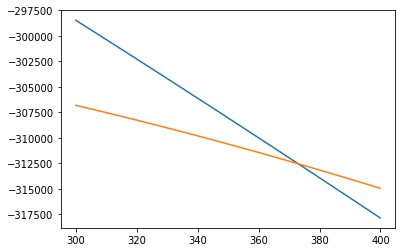

In [52]:
plt.plot(T,deltaG_gas)
plt.plot(T, deltaG_liq)
plt.show()
#donde se cruzan,corresponde al punto de ebullición del agua en K#
#G_gas es = a G del liquido. 

In [53]:
dp=(deltaG_gas-deltaG_liq)**2
np.min(dp)
minimo=np.min(dp)
np.where(dp==minimo)

(array([730]),)

In [54]:
T[730]

373.0000000000166

# NO2 #

In [55]:
import requests

In [60]:
url="https://janaf.nist.gov/tables/N-007.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]                 
for x in datos:
    s=x.split("\t")
    mat.append([float(a) for a in (s)])   
mat=np.array(mat)

                  
   #partimos los datos donde aparecen los n#

6000	57.995	394.926	341.985	317.647	23.608	413.748	-3.602


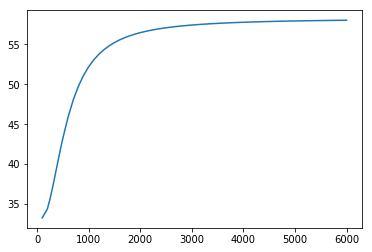

In [66]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
print(x)
plt.show()

# N2O4

In [68]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ 16.10851352,  75.89539116, -54.3872296 ,  14.30775044,
         0.23942371])

In [69]:
Cp_calc=beta.dot(X.T)

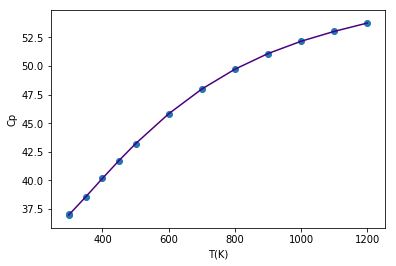

In [70]:

plt.plot(T,Cp_calc,color="indigo")
plt.scatter(T,y)
plt.xlabel("T(K)")
plt.ylabel("Cp")
plt.show()